# Car Evaluation Classification

### Importing the dataset

In [1]:
# Common Python packages that will be used throughout project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# List of column names. A header needs to be added because the raw data does not contain one.
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Create DataFrame from the dataset.
df = pd.read_csv('C:/Users/Admin/Desktop/ML/4/Final/car-evaluation-ML/car.data.csv', header=None, names=col_names)

In [5]:
# Display the first five rows of the DataFrame.
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# Get a summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
# Get a count of the number of unique values for each feature column in the DataFrame.
feature_names = list(df.columns.values[:-1])
for feature in feature_names:
    unique_count = df[feature].nunique()
    unique_vals = df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [8]:
# Get a count of the number of unique values for the label column.
label_name = df.columns.values[-1]
print("{}: {} values, {}".format(label_name, df[label_name].nunique(), df[label_name].unique()))

class: 4 values, ['unacc' 'acc' 'vgood' 'good']


There are four unique values in the label column and like the feature columns they are ordinal.

In [9]:
# Display total counts for each of the unique values in the label column.
df[label_name].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

This dataset is clearly dominated by unacceptable cars!

### Encoding the data

In [10]:
# Create dummy columns for the categorical features. The drop_first parameter takes care of the k-1 explained above.
df_encoded = pd.get_dummies(df, columns=feature_names, drop_first=True)
df_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,good,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,vgood,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,unacc,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,good,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,vgood,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [11]:
# Encode the class column. The class column contains the labels.
# class_uniques will be used later to map the predicted classes back into the original labels for easier interpretation. 
df_encoded['class'], class_uniques = pd.factorize(df_encoded['class'])
df_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


Following the encoding process, the class column is first in the DataFrame instead of being the last. For readability it makes sense to move it back to its logical position as the last column. 

In [12]:
# Save the class column as a Pandas Series.
class_col = df_encoded['class']
# Remove class column from DataFrame.
df_encoded.drop(columns=['class'], inplace=True)
# Get the position of where the last column will be inserted.
last_col_pos = df_encoded.columns.get_loc('safety_med') + 1
# Insert the class column back into the DataFrame.
df_encoded.insert(last_col_pos, 'class', class_col)
df_encoded.tail()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,3
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,2
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,3
1727,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2


### Creating the model

In [13]:
# Features.
X = df_encoded.loc[:, 'buying_low':'safety_med']
# Labels.
y = df_encoded.loc[:, 'class']

The available data needs to be split into a training set to build the model, and a test set used to establish its accuracy.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into a training and test set with a 75%:25% split.
# The setting of the random state parameter allows for reproducability (i.e the split will always yield the same results).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier using 100 decision trees.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier. This is where the forest of decision trees are created.
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Testing and evaluating the model

With the model trained it can now be used to make predictions on the test set data.

In [16]:
# Predict the test set results.
y_pred = clf.predict(X_test)
# Show first five predictions.
y_pred[0:5]

array([0, 3, 0, 1, 0], dtype=int64)

The predictions are still encoded, so to make them readable they must be converted back into their original labels. This is done by mapping the class names back onto the predictions using the class_uniques variable created by the factorize() method earlier.

In [17]:
class_uniques

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

So 0 = unacc, 1 = acc, 2 = vgood and 3 = good. Note that this is the ordering chosen by default during the encoding of the class column and not a chosen order.

In [18]:
# Mapping back to original class names.
y_pred_labelled = class_uniques[y_pred]
# Show first five predictions.
y_pred_labelled[0:5]

Index(['unacc', 'good', 'unacc', 'acc', 'unacc'], dtype='object')

While the classifier provides a prediction for each observation in the test set, it doesn't mean that it is 100% sure.

In [19]:
# Predicted probabilities of the first five predictions.
clf.predict_proba(X_test)[0:5]

array([[0.94, 0.06, 0.  , 0.  ],
       [0.39, 0.02, 0.01, 0.58],
       [0.89, 0.11, 0.  , 0.  ],
       [0.1 , 0.54, 0.12, 0.24],
       [0.97, 0.  , 0.  , 0.03]])

The first row above is the first observation of the test set and the classifier was 94% sure that it was an unacceptable class of vehicle (class 0). In the second observation it was only 58% sure that it was a good class of vehicle (class 3).

So how accurate was this basic model?

In [20]:
from sklearn.metrics import accuracy_score

# Get the accuracy classification score.
accuracy_score(y_test, y_pred)

0.8865740740740741

The model was correct with 88.7% of its predictions. 

Though the accuracy is a useful indicator of performance, a confusion matrix can be used to delve into more detail. A confusion matrix is so named because it shows where the classifier is confused/incorrect with its predictions. Here it shows totals of the classifier's correct and incorrect predicted labels vs the actual labels for the test set. 

In [21]:
from sklearn.metrics import confusion_matrix

# Restore the class labels from encoded values back to their original strings.
y_pred = class_uniques[y_pred]
y_test = class_uniques[y_test]
# Create the confusion matrix. Setting the labels parameter sets the order of the columns and rows in the matrix.
# First row/column shows unacceptable, second row/column shows acceptable etc.
confusion_matrix(y_test, y_pred, labels=['unacc', 'acc', 'good', 'vgood'])

array([[291,   3,   0,   0],
       [ 17,  79,   6,   1],
       [  0,   9,   6,   0],
       [  0,  10,   3,   7]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

# Display the precision, recall and F1 score for each class.
print(classification_report(y_test, y_pred, labels=['unacc', 'acc', 'good', 'vgood']))

              precision    recall  f1-score   support

       unacc       0.94      0.99      0.97       294
         acc       0.78      0.77      0.77       103
        good       0.40      0.40      0.40        15
       vgood       0.88      0.35      0.50        20

    accuracy                           0.89       432
   macro avg       0.75      0.63      0.66       432
weighted avg       0.88      0.89      0.88       432



### Ordinal data

In [23]:
df_ordinal = df.copy()
df_ordinal.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Now to encode the features and label columns, implementing a logical ordering system for each.

In [24]:
# Create the new encoded columns in the DataFrame by mapping the feature and label columns with the desired order.
df_ordinal['buying_ordinal'] = df_ordinal['buying'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
df_ordinal['maint_ordinal'] = df_ordinal['maint'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
df_ordinal['doors_ordinal'] = df_ordinal['doors'].map({'2':0, '3':1, '4':2, '5more':3})
df_ordinal['persons_ordinal'] = df_ordinal['persons'].map({'2':0, '4':1, 'more':2})
df_ordinal['lug_boot_ordinal'] = df_ordinal['lug_boot'].map({'small':0, 'med':1, 'big':2})
df_ordinal['safety_ordinal'] = df_ordinal['safety'].map({'low':0, 'med':1, 'high':2})
df_ordinal['class_ordinal'] = df_ordinal['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})
# Remove the original columns.
df_ordinal.drop(columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], inplace=True)
# View last five rows of DataFrame.
df_ordinal.tail()

,buying_ordinal,maint_ordinal,doors_ordinal,persons_ordinal,lug_boot_ordinal,safety_ordinal,class_ordinal
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2
1727,0,0,3,2,2,2,3


### Creating and evaluting the model

With the data processed the model can be created using the same process as before.

In [25]:
# Features.
X_ord = df_ordinal.iloc[:, :-1]
# Labels.
y_ord = df_ordinal.iloc[:, -1]
# Split the data for training and testing the classifier model.
X_ordtrain, X_ordtest, y_ordtrain, y_ordtest = train_test_split(X_ord, y_ord, test_size=0.25, random_state=42)
# Create the classifier.
clf_ord = RandomForestClassifier(n_estimators=100, random_state=42)
clf_ord.fit(X_ordtrain, y_ordtrain)
y_ordpred = clf_ord.predict(X_ordtest)

WIth the new model created how does its accuracy compare to the previous one?

In [26]:
accuracy_score(y_ordtest, y_ordpred)

0.9629629629629629

The accuracy of the model which utilised data prepared by recognising ordinality rose from 88.7% to 96.3%.

In [27]:
# The labels were specified in the mapping earlier (unacc=0, acc=1, good=2, vgood=3).
confusion_matrix(y_ordtest, y_ordpred, labels=[0, 1, 2, 3])

array([[294,   0,   0,   0],
       [  3,  91,   8,   1],
       [  0,   0,  14,   1],
       [  0,   1,   2,  17]], dtype=int64)

In [28]:
# Display the precision, recall and F1 score for each class.
print(classification_report(y_ordtest, y_ordpred, labels=[0, 1, 2, 3]))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.99      0.88      0.93       103
           2       0.58      0.93      0.72        15
           3       0.89      0.85      0.87        20

    accuracy                           0.96       432
   macro avg       0.86      0.92      0.88       432
weighted avg       0.97      0.96      0.96       432



This model is an improvement, as indicated by the accuracy score and the diagonal of the confusion matrix. The F1 score for all classes improved, but the good and vgood classes still trail.

In [29]:
# Get the column names of the ordinal DataFrame from part two (apart from last which is the label column).
feat_names = list(df_ordinal.columns.values)[:-1]
# Get the feature importances from the RandomForestClassifier attribute.
feat_importances = clf_ord.feature_importances_
# Display the importances for each feature.
for name, imp in zip(feat_names, feat_importances):
    print("{}: {}".format(name, imp))

buying_ordinal: 0.15679496973015414
maint_ordinal: 0.15363336272819894
doors_ordinal: 0.06504475841161442
persons_ordinal: 0.23122593193956503
lug_boot_ordinal: 0.08972317931508356
safety_ordinal: 0.30357779787538386


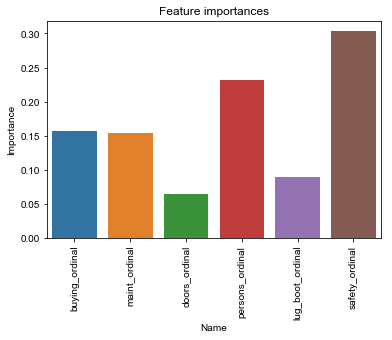

In [28]:
# Create bar plot of feature importance.
feat_imp_plot = sns.barplot(y=feat_importances, x=feat_names)
sns.set_style('darkgrid')
# Annotate plot.
plt.title("Feature importances")
plt.xlabel('Name')
plt.ylabel('Importance')
# Orientate the x-axis labels.
feat_imp_plot.set_xticklabels(feat_imp_plot.get_xticklabels(), rotation=90)
plt.show()

It appears that the car's safety (safety_ordinal), responsible for almost a third of the prediction, is the most important feature in this car evaluation dataset. The number of doors (doors_ordinal) and size of the boot (lug_boot_ordinal) are the features that have the least impact on the predictions. 

### Creating and evaluting the model

In [30]:
from sklearn.feature_selection import SelectFromModel

# Sort the threshold importances.
feat_importances.sort()
# List to store number of selected features in each model.
num_selected_features = []
# List to store the accuracy of each model.
acc_scores = []
# Create, train and evaluate the accuracy of a classifier for selected features included at each threshold value.
for importance in feat_importances:
    print("\nThreshold importance value: {}".format(importance))

    # Create a meta-transformer for selecting features equal to or above a threshold importance value.
    sfm = SelectFromModel(clf_ord, threshold=importance)
    # Fit the meta-transformer on the training data.
    sfm.fit(X_ordtrain, y_ordtrain)

    # Get an array of indices of the selected features.
    imp_feature_indices = sfm.get_support(indices=True)
    
    # Get a count of the number of selected features at this threshold value.
    selected_features_count = len(imp_feature_indices)
    # Append count to list of numbers of selected features.
    num_selected_features.append(selected_features_count)
    # Display the number of selected features.
    print("{} selected features:".format(selected_features_count))
    
    # Use the indices array to print the selected features' index in the DataFrame, name and importance value.
    for imp_feature_index in imp_feature_indices:
        imp_feature_name = df_ordinal.columns[imp_feature_index]
        imp_feature_value = sfm.estimator_.feature_importances_[imp_feature_index]
        print("Df index: {}, Feature name: {}, Importance val: {}".format(imp_feature_index, imp_feature_name, imp_feature_value))

    # Reduce the features 'X' to just the selected features.
    X_fstrain = sfm.transform(X_ordtrain)
    X_fstest = sfm.transform(X_ordtest)

    # Create the classifier and make predictions.
    clf_fs = RandomForestClassifier(n_estimators=100, random_state=42)
    clf_fs.fit(X_fstrain, y_ordtrain)
    y_fspred = clf_fs.predict(X_fstest)

    # Calculate the accuracy of the classifier.
    acc = accuracy_score(y_ordtest, y_fspred)
    # Append accuracy score to list of accuracy scores.
    acc_scores.append(acc)
    # Display the accuracy.
    print("Accuracy: {}".format(acc))

    # Display a confusion matrix. The labels were specified in the mapping earlier (unacc=0, acc=1, good=2, vgood=3).
    print(confusion_matrix(y_ordtest, y_fspred, labels=[0, 1, 2, 3]))


Threshold importance value: 0.06504475841161442
6 selected features:
Df index: 0, Feature name: buying_ordinal, Importance val: 0.15679496973015414
Df index: 1, Feature name: maint_ordinal, Importance val: 0.15363336272819894
Df index: 2, Feature name: doors_ordinal, Importance val: 0.06504475841161442
Df index: 3, Feature name: persons_ordinal, Importance val: 0.23122593193956503
Df index: 4, Feature name: lug_boot_ordinal, Importance val: 0.08972317931508356
Df index: 5, Feature name: safety_ordinal, Importance val: 0.30357779787538386
Accuracy: 0.9629629629629629
[[294   0   0   0]
 [  3  91   8   1]
 [  0   0  14   1]
 [  0   1   2  17]]

Threshold importance value: 0.08972317931508356
5 selected features:
Df index: 0, Feature name: buying_ordinal, Importance val: 0.15679496973015414
Df index: 1, Feature name: maint_ordinal, Importance val: 0.15363336272819894
Df index: 3, Feature name: persons_ordinal, Importance val: 0.23122593193956503
Df index: 4, Feature name: lug_boot_ordina

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


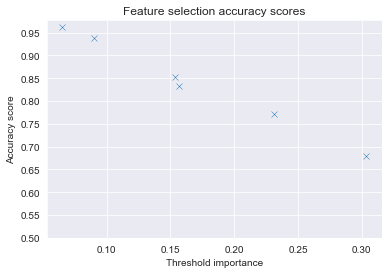

In [32]:
# Plot scatterplot with the accuracies at each threshold value.
sns.scatterplot(feat_importances, acc_scores, marker='x')
sns.set_style('darkgrid')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.title("Feature selection accuracy scores")
plt.xlabel("Threshold importance")
plt.ylabel("Accuracy score")
plt.show()

This plot shows the change in model accuracy as backward elimination progresses, with the leftmost point representing the model with all features present and the rightmost point representing it with just the most important feature remaining. As features are removed the accuracy of the model reduces, almost linearly it seems.

The confusion matrices also seem to show that as the number of selected features used in training decreases, the model tends towards predicting unacceptable and acceptable car classes. With just the safety_ordinal feature in the training set, all predictions were of the unacceptable class. Again this is perhaps due to the imbalance in the dataset.

Finally the percentage fall in accuracy of each of these feature selection models from the original can be calculated.

In [33]:
# Create a new DataFrame where each row represents one of the feature selection models. 
df_fs_results = pd.DataFrame({"threshold_importance" : feat_importances, "no_selected_features" : num_selected_features, "accuracy" : acc_scores})
df_fs_results

,threshold_importance,no_selected_features,accuracy
0,0.065045,6,0.962963
1,0.089723,5,0.937500
2,0.153633,4,0.851852
3,0.156795,3,0.833333
4,0.231226,2,0.770833
5,0.303578,1,0.680556


Percentage change is calculated using the formula:

$$percentage\;change = \frac{new\;value - original\;value}{original\;value} \times 100$$

In [34]:
# Create a percentage change column in the DataFrame which shows the accuracy change of each feature selection model from the original.
df_fs_results["acc_pct_change"] = df_fs_results["accuracy"].apply(lambda x: ((x - df_fs_results["accuracy"].iloc[0])/df_fs_results["accuracy"].iloc[0]) * 100)
df_fs_results

,threshold_importance,no_selected_features,accuracy,acc_pct_change
0,0.065045,6,0.962963,0.000000
1,0.089723,5,0.937500,-2.644231
2,0.153633,4,0.851852,-11.538462
3,0.156795,3,0.833333,-13.461538
4,0.231226,2,0.770833,-19.951923
5,0.303578,1,0.680556,-29.326923


## Conclusion

It is clear that the data preprocessing stage is very important. Recognising the ordinality in the Car Evaluation Data Set yielded a large increase in the accuracy of the random forest classifer model, rising from 88.7% to 96.3%. As the precision and recall metrics showed, a well balanced dataset for the classifier to train on for each class label is desirable.

Feature selection using threshold feature importance values saw a reduction in model accuracy as fewer features were used to train the model. Training the model on just the single most important feature gave an accuracy of 68%, almost 30% lower than the model trained on all its features. However this technique can be of use in models with much larger datasets where training time and memory are a factor.

In [ ]:
1. What is Random Forest and how does it work?
Random Forest is an ensemble learning method that constructs a multitude of decision trees during training 
and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

2. Why is it called "Random" Forest?
The "Random" in Random Forest comes from the random selection of subsets of features and samples (using bagging) 
during the construction of individual decision trees. This randomness helps to decorrelate the trees 
and improves the model'srobustness.

3. How does Random Forest handle overfitting?
Random Forest mitigates overfitting by training multiple decision trees on different subsets of the data and features. 
The ensemble nature of Random Forest helps to reduce the variance associated with individual trees, 
making the model less prone to overfitting.

4. What is bagging, and how is it used in Random Forest?
Bagging (Bootstrap Aggregating) is a technique where multiple subsets 
of the training data are sampled with replacement (bootstrap samples),and a model is trained on each subset. 
In Random Forest, bagging is used to train individual decision trees on different subsets of the data.

5. How does Random Forest handle missing values in data?
Random Forest can handle missing values by using the majority class for imputation during training. It can also use out-of-bag samples for unbiased imputation. Additionally, the Random Forest algorithm is robust to missing values, and imputation is not always necessary.

6. What are the hyperparameters of Random Forest?
Some important hyperparameters include n_estimators (number of trees), max_depth (maximum depth of each tree), max_features (number of features considered for each split), and others. These parameters can be tuned to optimize model performance.

7. How does Random Forest determine feature importance?
Feature importance in Random Forest is determined by evaluating how much each feature contributes to the overall performance of the model. Features that lead to more significant reductions in impurity (e.g., Gini impurity) are considered more important.

8. Can Random Forest be used for regression tasks?
Yes, Random Forest can be used for both classification and regression tasks. For regression, the output is the average of the individual tree predictions.

9. What is the Out-of-Bag (OOB) error in Random Forest?
The Out-of-Bag error is an estimate of the model's performance on unseen data. It is computed by evaluating each tree on the samples that were not included in its bootstrap sample during training.

10. How can you prevent overfitting in a Random Forest model?
typescript
You can prevent overfitting in a Random Forest model by tuning hyperparameters, such as limiting the depth of the trees (`max_depth`), increasing the number of trees (`n_estimators`), and adjusting the number of features considered for each split (`max_features`).


In [ ]:
Confusion Matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It helps in understanding the performance of a classification algorithm by breaking down the predictions into four categories: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

Here's a breakdown of each component of the confusion matrix:

True Positive (TP):

Instances that are actually positive and are correctly predicted as positive by the model.
True Negative (TN):

Instances that are actually negative and are correctly predicted as negative by the model.
False Positive (FP) - Type I Error:

Instances that are actually negative but are incorrectly predicted as positive by the model.
False Negative (FN) - Type II Error:

Instances that are actually positive but are incorrectly predicted as negative by the model.
The confusion matrix is usually presented in the following format:

mathematica
Copy code
              | Predicted Positive | Predicted Negative |
Actual Positive |        TP          |        FN          |
Actual Negative |        FP          |        TN          |
Here's how precision, recall, and F1-score are related to the confusion matrix:

Precision:

Precision is the ratio of TP to the total predicted positives. It is a measure of the accuracy of positive predictions.
Formula: Precision=TP/TP+FP
 
Recall (Sensitivity or True Positive Rate):
Recall is the ratio of TP to the total actual positives. It measures the ability of the model to capture all the positive instances.
Formula: Recall=TP/TP+FN

F1-Score:

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
Formula: F1-Score =2×Precision×Recall/Precision+Recall
 
These metrics can be calculated directly from the values in the confusion matrix. Understanding the confusion matrix and associated metrics helps in assessing the strengths and weaknesses of a classification model and can guide model improvement efforts.